In [1]:
import pandas as pd
df=pd.read_csv(r'DiwaliSales.csv', encoding='latin1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [2]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [3]:
df.shape

(11251, 15)

In [4]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace = True)

In [7]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mode()[0])

In [8]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [10]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9451.961286
std,1.716125e+03,12.754122,0.493632,1.115047,5219.814017
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


What is the count of male and female, visualise it using bar plot ?

In [11]:
count=df['Gender'].value_counts()
count

Gender
F    7842
M    3409
Name: count, dtype: int64

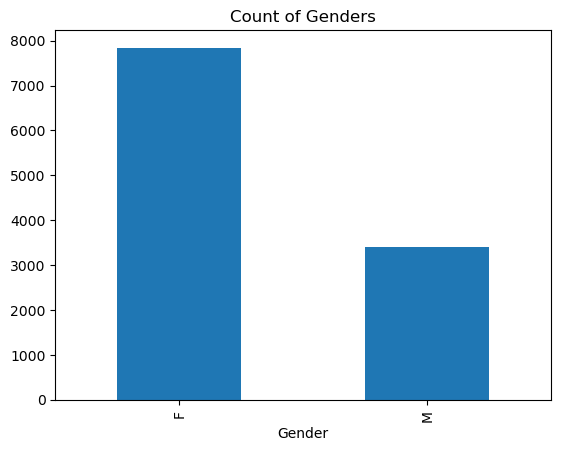

In [12]:
import matplotlib.pyplot as plt
count.plot(kind='bar')
plt.xlabel('Gender')
plt.title("Count of Genders")
plt.show()

What is the purchase amount of females and males?

In [13]:
amount=df.groupby(['Gender'])['Amount'].sum().sort_values(ascending=False)
amount

Gender
F    74414926.43
M    31929090.00
Name: Amount, dtype: float64

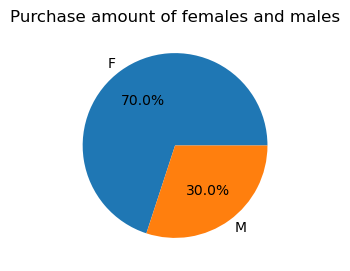

In [55]:
amount.plot(kind='pie', autopct='%1.1f%%')
plt.title("Purchase amount of females and males")
plt.rcParams['figure.figsize'] = (3, 3)
plt.ylabel('')
plt.show()

What is total amount by age group? Visualise it using bar plot

In [15]:
total_amount_by_age=df.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False)
total_amount_by_age

Age Group
26-35    42629257.94
36-45    22168716.49
18-25    17240732.00
46-50     9239472.00
51-55     8277291.00
55+       4088894.00
0-17      2699653.00
Name: Amount, dtype: float64

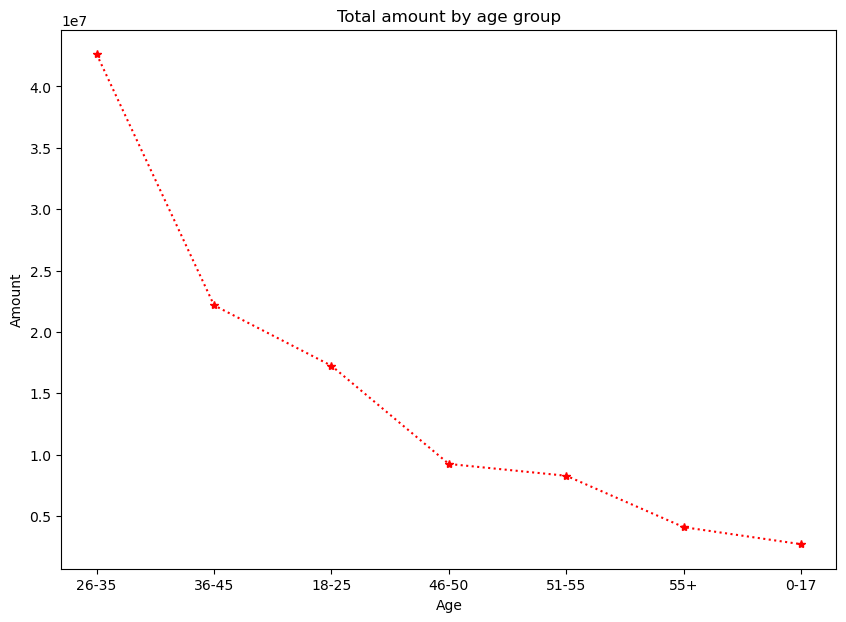

In [40]:
plt.plot(total_amount_by_age, linestyle= 'dotted',color='red', marker='*')
plt.rcParams['figure.figsize'] = (10, 7)
plt.title("Total amount by age group")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

What is the total number of orders from top 10 states

In [17]:
top_states=df.groupby(['State'])['Orders'].sum().sort_values(ascending=False).head(5).reset_index()
top_states

,State,Orders
0,Uttar Pradesh,4813
1,Maharashtra,3811
2,Karnataka,3241
3,Delhi,2744
4,Madhya Pradesh,2259


C:\Users\DELL\AppData\Local\Temp\ipykernel_10716\2613362058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='Orders', palette='Set1')


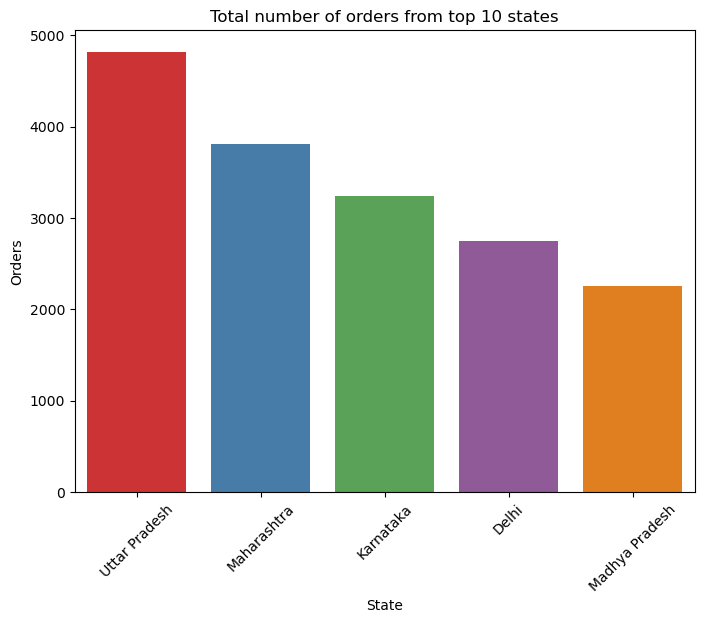

In [18]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
sns.barplot(data=top_states, x='State', y='Orders', palette='Set1')
plt.title("Total number of orders from top 10 states")
plt.xlabel("State")
plt.ylabel("Orders")
plt.xticks(rotation=45)  
plt.show()

What is the marital status of gender by amount?

In [19]:
marital_status=df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
marital_status

,Marital_Status,Gender,Amount
0,0,F,43810369.44
1,1,F,30604556.99
2,0,M,18346645.00
3,1,M,13582445.00


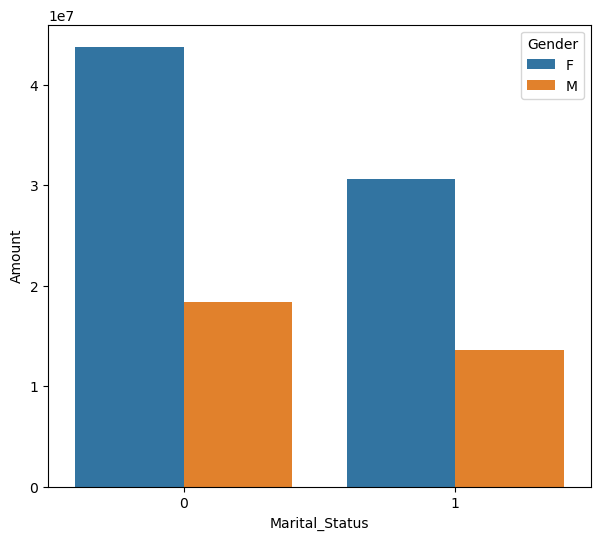

In [59]:
sns.barplot(data=marital_status, x='Marital_Status', y='Amount', hue='Gender')
plt.rcParams['figure.figsize'] = (7, 6)
plt.show()

Occupation by Amount

In [21]:
occupation=df.groupby(['Occupation'])['Amount'].sum().sort_values(ascending=False).reset_index()
occupation

,Occupation,Amount
0,IT Sector,14794614.00
1,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10786424.95
4,Govt,8517212.00
5,Hospitality,6392219.00
6,Media,6295832.99
7,Automobile,5376503.00
8,Chemical,5305343.00
9,Lawyer,4981665.00


C:\Users\DELL\AppData\Local\Temp\ipykernel_10716\2834466166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=occupation, x='Occupation', y='Amount', palette='Set1')


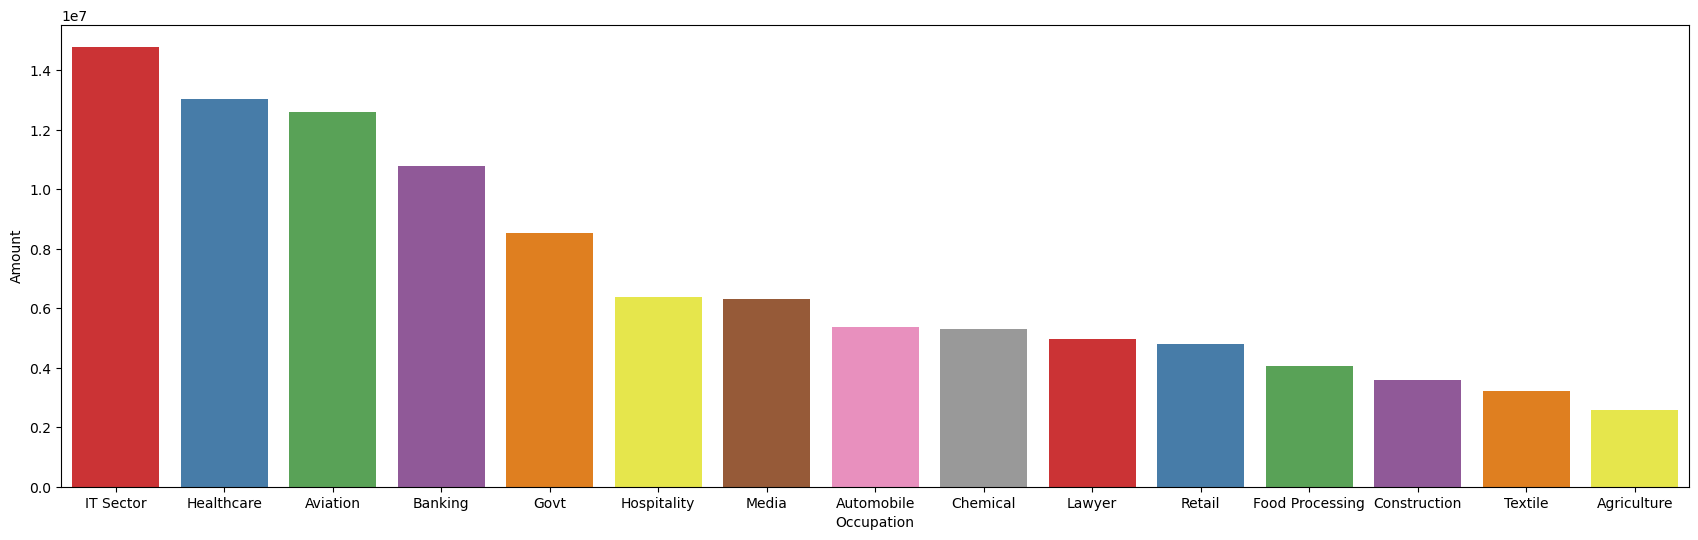

In [22]:
plt.rcParams['figure.figsize'] = (21, 6)
sns.barplot(data=occupation, x='Occupation', y='Amount', palette='Set1')
plt.show()

What are the top 10 most sold products?

In [51]:
sold_products=df.groupby(['Product_Category'])['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
sold_products

,Product_Category,Orders
0,Clothing & Apparel,6634
1,Food,6120
2,Electronics & Gadgets,5226
3,Footwear & Shoes,2654
4,Household items,1331
5,Beauty,1086
6,Games & Toys,940
7,Furniture,890
8,Sports Products,870
9,Pet Care,536


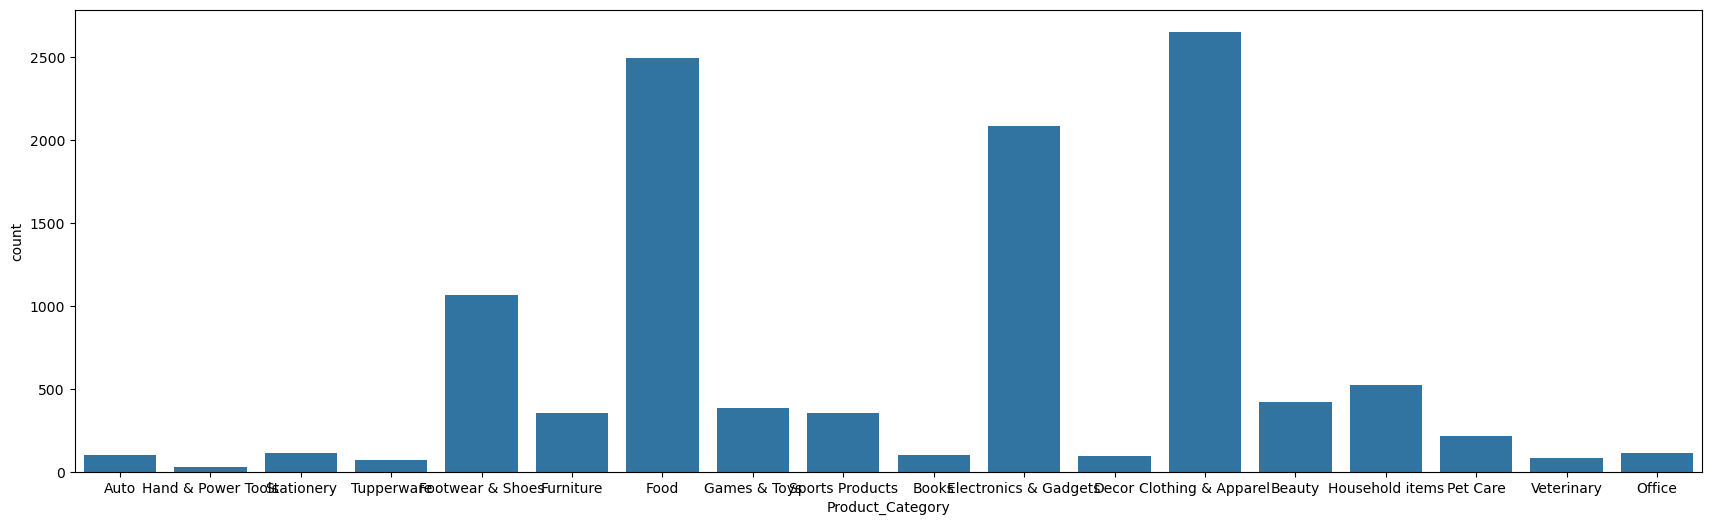

In [52]:
sns.countplot(data=df, x='Product_Category')
plt.rcParams['figure.figsize'] = (21, 6)
plt.show()

Total Sales by Gender and Age Group

In [25]:
pivot1 = pd.pivot_table(df, index='Gender', columns='Age Group', values='Amount', aggfunc='sum')
pivot1

Age Group,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,1441409.0,11887003.0,30979768.94,15533678.49,6767114.0,5393115.0,2412838.0
M,1258244.0,5353729.0,11649489.00,6635038.00,2472358.0,2884176.0,1676056.0


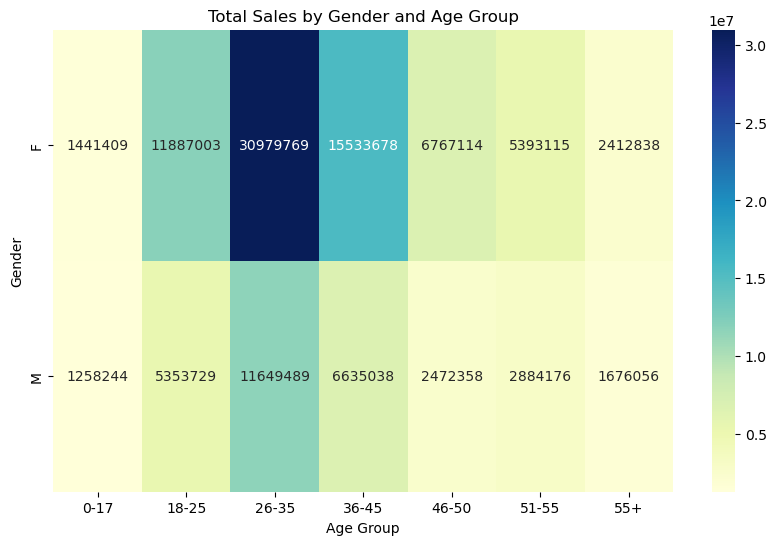

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot1, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Total Sales by Gender and Age Group")
plt.show()

Average Orders by Occupation and Product Category

In [27]:
pivot2 = pd.pivot_table(df, index='Occupation', columns='Product_Category', values='Orders', aggfunc='mean')
pivot2

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Occupation,,,,,,,,,,,,,,,,,,
Agriculture,4.000000,2.500000,2.333333,2.557143,3.000000,2.680851,2.411765,2.625000,2.400000,2.000000,3.000000,2.714286,2.428571,3.142857,2.250000,2.250000,2.333333,3.000000
Automobile,2.625000,2.842105,2.000000,2.419118,3.333333,2.346154,2.443396,2.591837,2.521739,2.538462,NaN,2.000000,2.000000,2.538462,1.947368,2.800000,2.333333,2.750000
Aviation,1.666667,2.589744,2.409091,2.366548,2.500000,2.528926,2.410256,2.554688,2.627907,2.500000,3.500000,2.363636,1.818182,2.615385,2.714286,2.857143,1.727273,3.000000
Banking,2.666667,2.666667,2.454545,2.489051,2.187500,2.436508,2.474178,2.517857,2.439024,2.446809,3.285714,2.500000,2.375000,2.000000,2.466667,2.500000,1.000000,2.888889
Chemical,NaN,2.384615,2.571429,2.353448,1.750000,2.394231,2.518797,2.214286,2.240000,2.687500,NaN,2.500000,2.500000,2.400000,2.888889,2.400000,3.250000,2.250000
Construction,2.500000,2.214286,3.000000,2.546296,2.571429,2.597701,2.092308,2.687500,2.631579,2.400000,1.000000,2.583333,2.000000,3.000000,2.200000,2.500000,2.333333,2.500000
Food Processing,3.000000,3.000000,1.666667,2.577320,3.600000,2.480392,2.532468,2.375000,2.166667,2.611111,NaN,2.588235,3.000000,2.555556,2.500000,2.500000,4.000000,2.500000
Govt,2.500000,2.829268,2.714286,2.547872,2.666667,2.480620,2.478632,2.527778,2.464286,2.266667,3.000000,2.641026,2.285714,2.352941,2.500000,2.600000,3.000000,3.250000
Healthcare,2.400000,2.423729,2.444444,2.529086,2.083333,2.470833,2.403030,2.315385,2.631579,2.638298,2.000000,2.422222,1.947368,2.346154,2.707692,2.666667,1.600000,1.714286


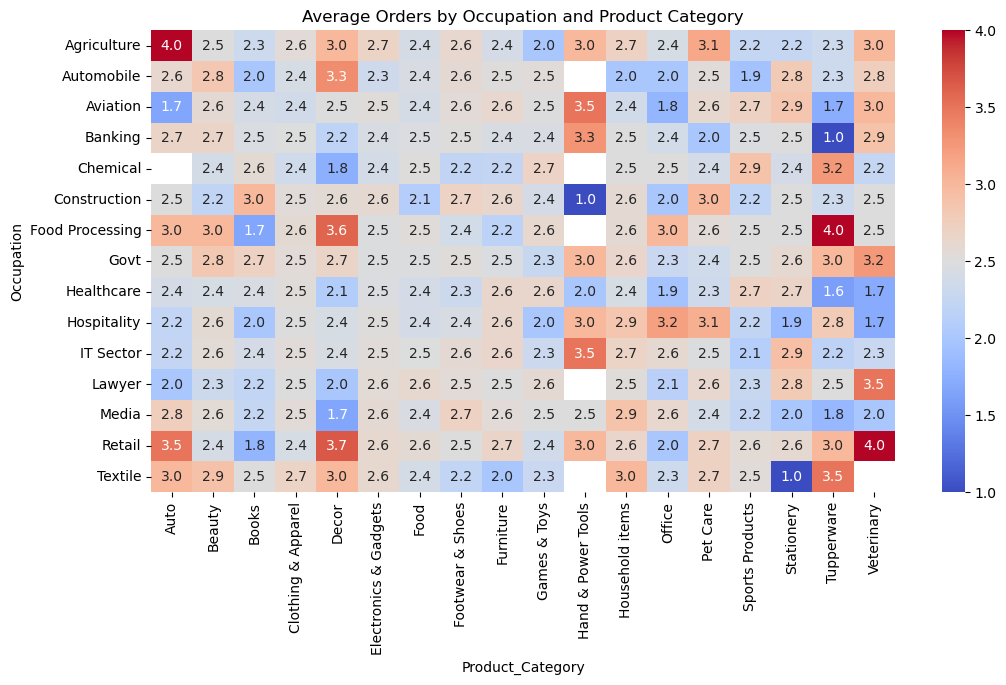

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot2, annot=True, fmt='.1f', cmap='coolwarm')
plt.title("Average Orders by Occupation and Product Category")
plt.show()

Customers by Gender and Marital Status

In [64]:
cross_tab = pd.crosstab(df['Gender'], df['Marital_Status'])
cross_tab

Marital_Status,0,1
Gender,,
F,4576,3266
M,1946,1463


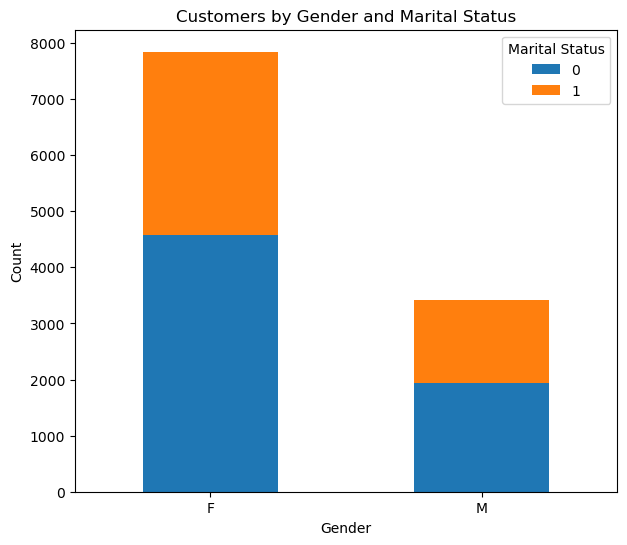

In [65]:
cross_tab.plot(kind='bar', stacked=True)
plt.title("Customers by Gender and Marital Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Marital Status")
plt.show()

Frequency of Product Categories across Age Groups

In [31]:
cross_tab = pd.crosstab(df['Age Group'], df['Product_Category'])
cross_tab

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Age Group,,,,,,,,,,,,,,,,,,
0-17,3,9,1,72,1,61,83,6,13,10,0,14,5,3,10,4,0,1
18-25,17,77,20,469,19,343,478,45,68,51,6,115,24,34,66,17,17,13
26-35,43,164,41,1057,33,832,992,424,137,163,10,271,41,87,134,53,19,42
36-45,18,82,22,532,23,413,456,306,69,84,7,75,23,37,82,24,19,14
46-50,6,33,9,234,10,186,213,122,29,35,0,23,7,32,27,6,9,6
51-55,8,37,7,188,5,177,168,110,26,28,1,14,7,13,27,6,7,3
55+,5,20,3,103,5,75,103,51,11,15,2,8,6,6,10,2,1,2


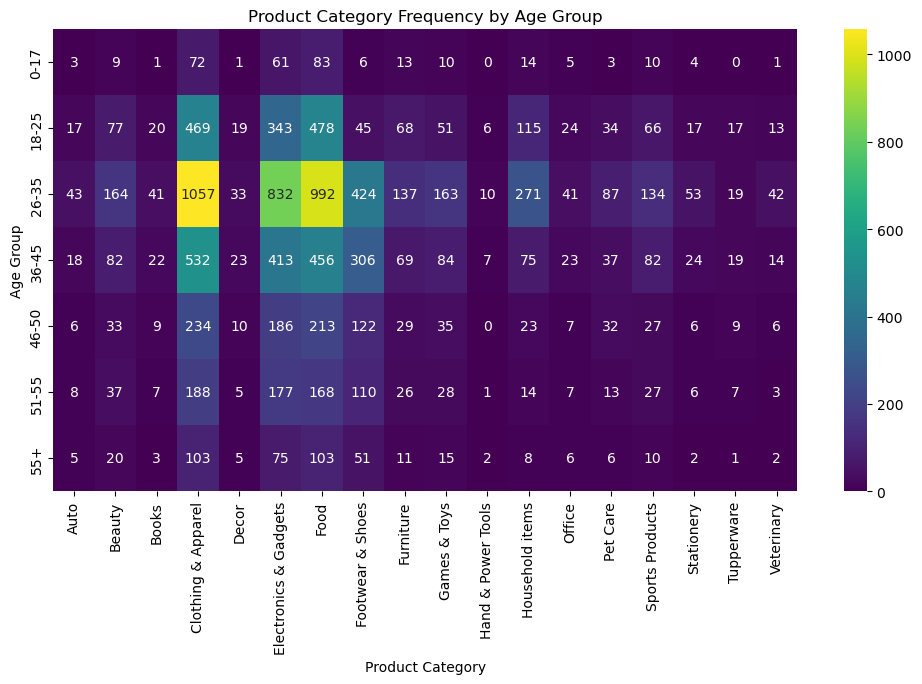

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title("Product Category Frequency by Age Group")
plt.ylabel("Age Group")
plt.xlabel("Product Category")
plt.show()